<a href="https://colab.research.google.com/github/rajat98v/Sign-Language-Recognition/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
 from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajat98v","key":"3bd74e6f20262cf73f5ed4f5c6ba5bf5"}'}

In [4]:
! mkdir ~/.kaggle 

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55           1670  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           3939  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           1883  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           7489  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

In [8]:
! kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:11<00:00, 138MB/s]
100% 1.03G/1.03G [00:11<00:00, 94.7MB/s]


In [9]:
!pwd

/content


In [9]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

# Resourse
## Code
- https://www.kaggle.com/serkanpeldek/cnn-practices-on-sign-language-digits (64X64)

## Dataset
- https://www.kaggle.com/grassknoted/asl-alphabet (200X200)

The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(215, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(29, activation='softmax')  
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [12]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/content/asl_alphabet_train/asl_alphabet_train"
image_generator = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = image_generator.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=126
)

validation_generator = image_generator.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=126
)

Found 87000 images belonging to 29 classes.
Found 87000 images belonging to 29 classes.


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_steps=50,
                              verbose=1)

Epoch 1/5
100/100 [==============================] - 36s 357ms/step - loss: 2.7638 - accuracy: 0.1991 - val_loss: 1.7138 - val_accuracy: 0.4625
Epoch 2/5
100/100 [==============================] - 35s 345ms/step - loss: 1.1626 - accuracy: 0.6265 - val_loss: 0.8036 - val_accuracy: 0.7365
Epoch 3/5
100/100 [==============================] - 33s 334ms/step - loss: 0.5927 - accuracy: 0.8021 - val_loss: 0.4905 - val_accuracy: 0.8357
Epoch 4/5
100/100 [==============================] - 33s 333ms/step - loss: 0.3374 - accuracy: 0.8880 - val_loss: 0.2760 - val_accuracy: 0.9033
Epoch 5/5
100/100 [==============================] - 33s 331ms/step - loss: 0.2393 - accuracy: 0.9194 - val_loss: 0.1609 - val_accuracy: 0.9471


In [15]:
model.save("rps.h5")

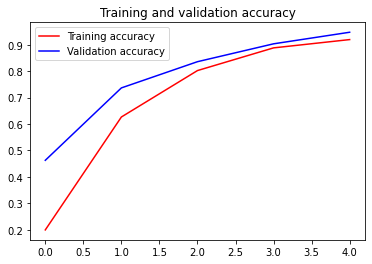

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [17]:


import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)



Saving D_test.jpg to D_test.jpg
D_test.jpg
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
